# 一、一元线性回归
## 1.概述：
在研究某些实际问题时往往涉及多个变量。假定因变量和自变量之间有某种关系，并把这种关系用适当的数学模型表达出来，则可以用该模型从而用给定的自变量来预测因变量，这就是回归要解决的问题。


在回归分析中，只涉及一个自变量时称为一元回归，涉及多个自变量时则称为多元回归。若因变量与自变量之间为线性关系，则为线性回归；若为非线性，则为非线性回归。


一元线性回归是一种统计分析方法，用于分析和建立两个变量间的线性关系模型。其背景源于对数据间关系的探索和预测需求，通过假设自变量（输入）与因变量（输出）呈线性关系，用数学模型拟合出数据的最佳直线，从而推测或预测因变量的值。模型形式为 𝑦 = 𝑎 + 𝑏𝑥，其中 𝑦 是因变量，𝑥 是自变量，𝑎 是截距，𝑏 是斜率，表示自变量每增加一个单位，因变量的变化量。

* 用途


一元线性回归常用于以下场景：

1. 预测与趋势分析：根据现有数据预测未来趋势，比如根据过去销售数据预测未来的销量。
2. 相关性研究：衡量和理解两个变量之间的关系。
3. 简化模型：为多变量回归模型打下基础，并提供数据特征的初步理解。

* 适用场景


一元线性回归适用于：

1. 数据呈线性关系：适合用于自变量和因变量呈近似线性关系的数据。
2. 噪声较小：数据变化规律相对平稳，极端值较少的情况下，回归效果较好。
3. 初步探索和特征筛选：作为数据分析的起点，帮助理解变量间的简单关系，适用于许多初步的数据挖掘和探索性分析。

一元线性回归建模的思路大致如下：
1. 确定因变量与自变量之间的关系。
2. 建立线性关系模型，并对模型进行估计与检验。
3. 利用回归方程进行预测。
4. 对回归模型进行诊断。

## 二、示例

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import pearsonr 
from scipy.stats import f 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm 
from statsmodels.stats.outliers_influence import summary_table 
from statsmodels.stats.stattools import durbin_watson 
# 设置初始化
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

## 1.确定变量间的关系

### 1.1 相关关系的描述

散点图是描述相关关系的一种常用工具。对于两个变量x和y，可根据散点图的分布形状等判断它们之间有没有关系、有什么关系以及关系的大致强度等。下面是随机模拟的不同形态的散点图。

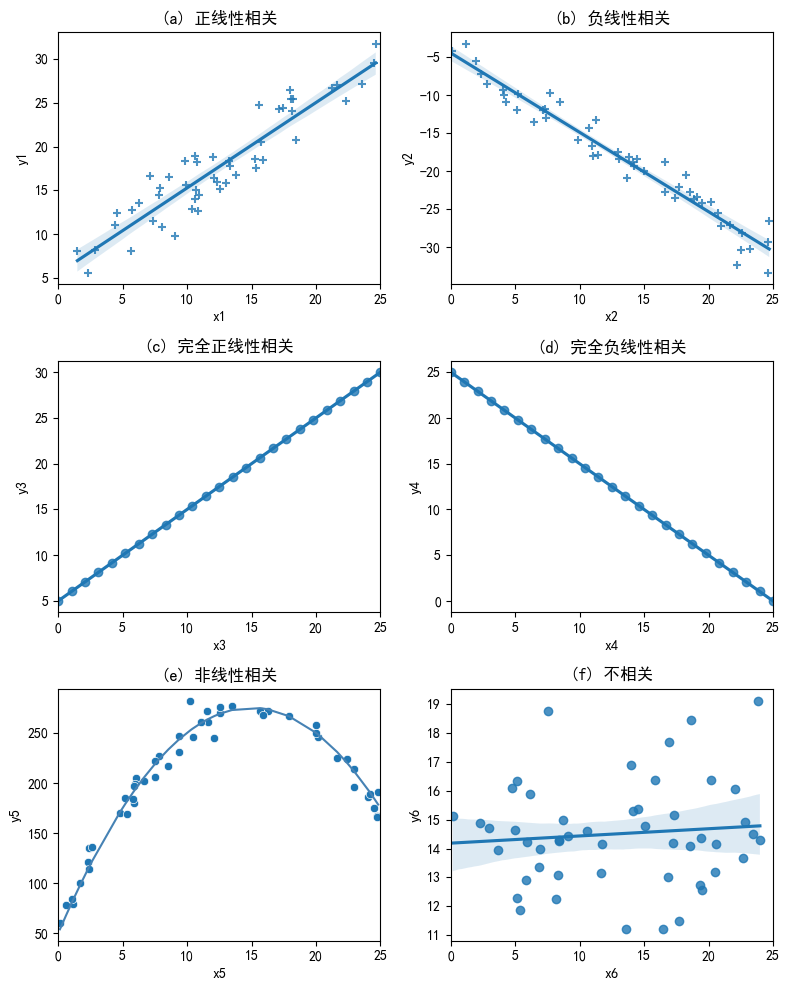

In [3]:
np.random.seed(123) # 设置随机种子
plt.subplots(3, 2, figsize=(8, 10)) 

plt.subplot(321) 
x1 = np.random.uniform(0, 25, size=50) 
y1 = x1 + 5 + np.random.normal(0, 2, size=50) 
sns.regplot(x=x1, y=y1, marker='+') 
plt.xlim(0, 25) 
plt.xlabel('x1') 
plt.ylabel('y1') 
plt.title('(a) 正线性相关') 

plt.subplot(322) 
x2 = np.random.uniform(0, 25, size=50) 
y2 = - x2 - 5 + np.random.normal(0, 2, size=50) 
sns.regplot(x=x2, y=y2, marker='+') 
plt.xlim(0, 25) 
plt.xlabel('x2') 
plt.ylabel('y2') 
plt.title('(b) 负线性相关') 

plt.subplot(323) 
x3 = np.linspace(0, 25, 25) 
y3 = x3 + 5 
sns.regplot(x=x3, y=y3, marker='o') 
plt.xlim(0, 25) 
plt.xlabel('x3') 
plt.ylabel('y3') 
plt.title('(c) 完全正线性相关') 

plt.subplot(324) 
x4 = np.linspace(0, 25, 25) 
y4 = - x4 + 25 
sns.regplot(x=x4, y=y4, marker='o') 
plt.xlim(0, 25) 
plt.xlabel('x4') 
plt.ylabel('y4') 
plt.title('(d) 完全负线性相关') 

plt.subplot(325) 
x5 = np.random.uniform(0, 25, size=50) 
y5 = -x5**2 + 30*x5 + 50 + np.random.normal(0, 10, size=50) 
sns.scatterplot(x=x5, y=y5, marker='o') 
sns.lineplot(x=x5, y=-x5**2 + 30*x5 + 50, color='steelblue') 
plt.xlim(0, 25) 
plt.xlabel('x5') 
plt.ylabel('y5') 
plt.title('(e) 非线性相关') 

plt.subplot(326) 
x6 = np.random.uniform(0, 25, size=50) 
y6 = np.random.normal(15, 2, size=50) 
sns.regplot(x=x6, y=y6, marker='o') 
plt.xlim(0, 25) 
plt.xlabel('x6') 
plt.ylabel('y6') 
plt.title('(f) 不相关') 

plt.tight_layout() # 设置子图的间距
plt.show() # 展示图像

图（a）和图（b）是典型的线性相关关系形态，两个变量的观测点分布在一条直线周围。图（a）显示一个变量的数值增加，另一个变量的数值也随之增加，因而称为正线性相关。图（b）显示一个变量的数值增加，另一个变量的数值随之减少，因而称为负线性相关。图（c）和图（d）显示两个变量的观测点完全落在直线上，称为完全线性相关（这实际上就是函数关系），其中图（c）为完全正相关，图（d）为完全负相关。图（c）显示两个变量之间是非线性关系。图（f）的观测点随机分布在一个水平带之内，无任何规律，表示变量之间没有相关关系。

数据：example9_1.csv 为研究销售收入与广告支出之间的关系，随机抽取20家医药生产企业，得到它们的销售收入与广告支出数据如下。

In [4]:
import pandas as pd
df = pd.read_csv("example9_1.csv",encoding='gbk')
df

,企业编号,销售收入,广告支出
0,1,4597.5,338.6
1,2,6611.0,811.0
2,3,7349.3,723.5
3,4,5525.7,514.0
4,5,4675.9,426.4
5,6,4418.6,426.3
6,7,5845.4,679.0
7,8,7313.0,847.3
8,9,5035.4,470.9
9,10,4322.6,393.8


绘制散点图描述销售收入与广告支出之间的关系。

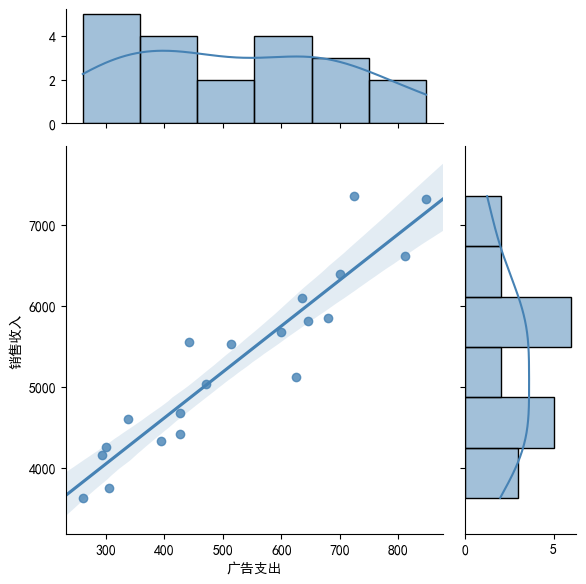

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

fig = sns.jointplot(x="广告支出", y="销售收入", data=df,
                    kind="reg", truncate=False,
                    color="steelblue",height=6,ratio=3,marginal_ticks=True)

上图显示，广告支出增加，销售收入也随之增加，二者的观测点分布在一条直线周围，因而具有正的线性相关关系。两个箱线图显示销售收入和广告支出基本上为对称分布。

### 1.2 关系强度的度量


要准确度量变量间的关系强度，还需要计算相关系数。

1. 相关系数


相关系数是度量两个变量之间线性关系强度的统计量。样本相关系数记为r，计算公式为：


$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

其中：
- $x_i$ 和 $y_i$ 是变量 $X$ 和 $Y$ 的各个观测值，
- $\bar{x}$ 和 $\bar{y}$ 是变量 $X$ 和 $Y$ 的均值，
- $n$ 是观测数据的数量。

取值范围
Pearson相关系数 $r$ 的取值范围为 $-1 \leq r \leq 1$。

取值解释
- **$r = 1$**：完全正相关，表示 $X$ 和 $Y$ 之间有完全线性的正向关系。
- **$r = -1$**：完全负相关，表示 $X$ 和 $Y$ 之间有完全线性的负向关系。
- **$r = 0$**：不相关，表示 $X$ 和 $Y$ 之间没有线性关系。

一般来说：
- **$r > 0$** 表示正相关，即 $X$ 增大时 $Y$ 也倾向于增大。
- **$r < 0$** 表示负相关，即 $X$ 增大时 $Y$ 倾向于减小。
- **$|r|$ 越接近 1**，表示两个变量的线性关系越强；
- **$|r|$ 越接近 0**，表示线性关系越弱。

2. 相关系数的检验


相关系数的显著性检验通常使用 **t 检验** 来评估两个变量的相关性是否在总体上显著。其具体步骤如下：

检验步骤
1. **提出假设**：
   - **原假设 $H_0$**：两个变量之间没有显著的线性相关性，即 $\rho = 0$（总体相关系数为 0）。
   - **备择假设 $H_1$**：两个变量之间存在显著的线性相关性，即 $\rho \neq 0$。

2. **计算 t 检验统计量**：
   根据样本相关系数 $r$，t 统计量的计算公式为：

   $$
   t = \frac{r \sqrt{n - 2}}{\sqrt{1 - r^2}}
   $$

   其中，$n$ 是样本量，$r$ 是样本的 Pearson 相关系数。

3. **确定显著性水平 $\alpha$**：
   一般选择显著性水平 $\alpha = 0.05$ 或 $0.01$，具体取值视实际问题和研究需求而定。

4. **做出决策**：
   - 求出统计量的 $P$ 值，如果 $P < \alpha$，拒绝 $H_0$，表示总体的两个变量之间线性关系显著。

沿用以上数据，计算销售收入与广告支出的相关系数，并检验其显著性（$ \alpha = 0.5$）。

In [6]:
import pandas as pd
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['销售收入'], df['广告支出'])
print (f"二者的相关系数为{corr: .4g}, 检验的p值为{p_value: .4g}")

二者的相关系数为 0.9371, 检验的p值为 1.161e-09


根据以上计算结果，检验的 $P$ 值接近于0，表示销售收入与广告费用之间存在显著的线性相关关系。

## 2.模型估计和检验

确定变量间的关系后，就可根据关系形态建立适当的回归模型。

### 2.1 回归模型与回归方程

描述因变量 $y$ 如何依赖于自变量 $x$ 和误差项 $\epsilon$ 的方程称为回归模型，一元线性回归模型通常可以表示为以下形式的线性方程：

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

其中：

- $y$ 是因变量（目标变量）的预测值。
- $x$ 是自变量（解释变量）。
- $\beta_0$ 是截距项（当 $x = 0$ 时的 $y$ 值）。
- $\beta_1$ 是回归系数（表示 $x$ 每增加一个单位时， $y$ 的平均变化量）。
- $\epsilon$ 是误差项（表示模型未能解释的部分，通常假设其期望为 0）。 

回归模型张的参数 $\beta_0$ 和 $\beta_1$ 是未知的，需要利用样本数据去估计。当用样本统计量 $\hat{\beta_0}$ 和 $\hat{\beta_1}$ 估计参数 $\beta_0$ 和 $\beta_1$ 时，就得到了估计的回归方程，它是根据样本数据求出的回归模型的估计。一元线性回归模型的估计方程为：

$$
\hat{y} = \hat{\beta_0} + \hat{\beta_1} x
$$

其中：

- $\hat{\beta_0}$ 是估计的回归直线在y轴上的截距。
- $\hat{\beta_1}$ 是直线的斜率，也称为回归系数。


### 2.2 参数的最小二乘估计

模型参数的估计通常采用最小二乘估计或称最小平方法估计。


最小二乘法用于估计一元线性回归模型中的参数 $\hat{\beta_0}$ 和 $\hat{\beta_1}$，使得预测值与实际观测值之间的误差平方和最小。估计公式如下：

$\hat{\beta_1}$ 的计算公式
$$
\hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$\hat{\beta_0}$ 的计算公式
$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}
$$

其中：
- $x_i$ 和 $y_i$ 是第 $i$ 个样本的观测值。
- $\bar{x}$ 和 $\bar{y}$ 分别是 $x$ 和 $y$ 的样本均值。
- $n$ 是样本总数。

以上公式利用了样本数据的均值和观测值，最小化误差平方和以估计回归系数。


沿用以上数据，估计销售收入（因变量）与广告支出（自变量）的回归方程：

In [7]:
from statsmodels.formula.api import ols
import pandas as pd

model = ols("销售收入~广告支出",data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   销售收入   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.16e-09
Time:                        23:05:37   Log-Likelihood:                -146.85
No. Observations:                  20   AIC:                             297.7
Df Residuals:                      18   BIC:                             299.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2343.8916    274.483      8.539      0.0

In [8]:
from statsmodels.stats.anova import anova_lm
anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
广告支出,1.0,2.013930e+07,2.013930e+07,129.762217,1.161175e-09
Residual,18.0,2.793629e+06,1.552016e+05,NaN,NaN


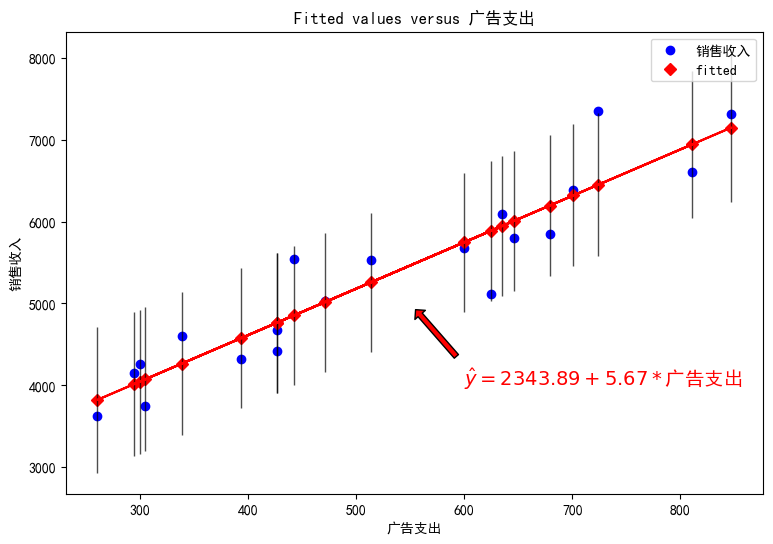

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(9, 6))
sm.graphics.plot_fit(model, exog_idx="广告支出", ax=ax)
plt.plot(df['广告支出'], model.fittedvalues, 'r')
plt.annotate(text=r'$\hat{y}=2343.89+5.67*$'+'广告支出', xy=(550, 5000), xytext=(600, 4000),
             arrowprops = {'headwidth': 10, 'headlength': 5, 'width': 4, 'facecolor': 'r', 'shrink': 0.1},
             fontsize=14, color='red', ha='left')  # 增加带箭头的文本注释
plt.show()

## 3.利用回归方程进行预测

回归分析的目的之一是根据所建立的回归方程用给定的自变量来预测因变量。如果对于 $x$ 的一个给定值 $x_0$，求出 $y_0$ 的一个预测值 $\hat{y_0}$，就是点估计。在点估计的基础上，可以求出 $y$ 的一个估计区间。估计区间有两种：均值的置信区间和个别值的预测区间。

### 3.1 均值的置信区间

均值的置信区间是对 $×$ 的一个给定值 $x$ 。求出的 $y$ 的均值的估计区间。比如，在2.2中,根据销售收人与广告支出的估计回归方程 $\hat{y}=2343.8916+5.6735x$，求出广告支出为600万元时销售收入均值的估计区间，这个区间就是因变量的置信区间。


设 $ E(y_0) $ 为给定 $x_0$ 时 $y$ 的期望值。则其在 $1-\alpha$ 置信水平下的置信区间为：

$\hat {y_0} \pm t_{\alpha/2} s_e \sqrt{\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum (x_i - \bar{x})^2}}$

### 3.2 个别值的预测区间

个别值的预测区间（prediction interval）是对 $x$ 的一个给定值 $x$ 。求出 $y$ 的一个个别值的估计区间。比如，在2.2中，如果不是想估计广告支出为600万元时销售收人均值的区间，只是想估计广告支出为600万元的那家企业（编号为18）销售收入的区间，这个区间就是个别值的预测区间。


在 $1-\alpha$ 置信水平下 $y$ 的一个个别值的预测区间为：

$\hat {y_0} \pm t_{\alpha/2} s_e \sqrt{1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum (x_i - \bar{x})^2}}$

* 例：沿用以上数据，求20家企业销售收入95%的置信区间预测区间，以及x=500时销售收入的点预测值、置信区间和预测区间。

In [10]:
conf_level = 0.95 
st, _, _ = summary_table(model, alpha=1-conf_level) 
columns = [x + ' ' + y for x, y in zip(st.data[0], st.data[1])] 
df_res = pd.DataFrame() 
for i in range(len(st.data) - 2):
    df_res = pd.concat([df_res, pd.DataFrame(st.data[i+2], index=columns).T], ignore_index=True) 
df_res.reset_index(drop=True, inplace=True) 
round(df_res, 2) 

,Obs,Dep Var Population,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Std Error Residual,Student Residual,Cook's D
0,1.0,4597.5,4264.92,126.89,3998.35,4531.50,3395.38,5134.47,332.58,372.96,0.89,0.05
1,2.0,6611.0,6945.07,168.77,6590.49,7299.64,6044.64,7845.49,-334.07,355.97,-0.94,0.10
2,3.0,7349.3,6448.64,133.55,6168.06,6729.22,5574.70,7322.58,900.66,370.63,2.43,0.38
3,4.0,5525.7,5260.05,88.18,5074.79,5445.31,4411.90,6108.20,265.65,383.96,0.69,0.01
4,5.0,4675.9,4763.05,100.13,4552.70,4973.41,3909.07,5617.04,-87.15,381.02,-0.23,0.00
5,6.0,4418.6,4762.49,100.15,4552.08,4972.89,3908.49,5616.48,-343.89,381.01,-0.90,0.03
6,7.0,5845.4,6196.17,117.80,5948.68,6443.66,5332.29,7060.05,-350.77,375.93,-0.93,0.04
7,8.0,7313.0,7151.01,184.43,6763.53,7538.49,6237.13,8064.90,161.99,348.12,0.47,0.03
8,9.0,5035.4,5015.52,91.69,4822.89,5208.15,4165.73,5865.32,19.88,383.14,0.05,0.00
9,10.0,4322.6,4578.10,108.79,4349.55,4806.65,3719.45,5436.75,-255.50,378.64,-0.67,0.02


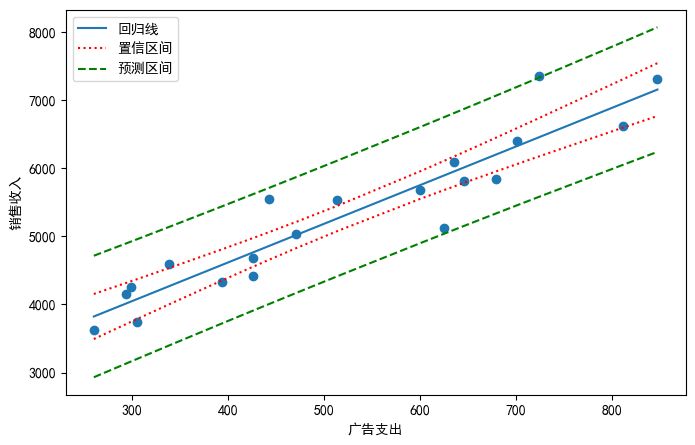

In [11]:
df_res['广告支出'] = df['广告支出'] # 添加广告支出变量
df_plot = df_res.sort_values(by='广告支出') # 按照广告支出变量排序
df_plot.reset_index(drop=True, inplace=True) # 重置索引

plt.figure(figsize=(8, 5)) 
plt.scatter(df_plot['广告支出'], df_plot['Dep Var Population']) # 绘制散点图
p1, = plt.plot(df_plot['广告支出'], df_plot['Predicted Value']) # 绘制回归拟合线
p2, = plt.plot(df_plot['广告支出'], df_plot['Mean ci 95% low'], 'r:') # 绘制置信区间下限
p3, = plt.plot(df_plot['广告支出'], df_plot['Mean ci 95% upp'], 'r:') # 绘制置信区间上限
p4, = plt.plot(df_plot['广告支出'], df_plot['Predict ci 95% low'], 'g--') # 绘制预测区间下限
p5, = plt.plot(df_plot['广告支出'], df_plot['Predict ci 95% upp'], 'g--') # 绘制预测区间上限
plt.xlabel('广告支出') 
plt.ylabel('销售收入') 
plt.legend([p1, p2, p4], ['回归线', '置信区间', '预测区间']) 
plt.show() 

以上代码框的预测结果中分别给出了样本观测序号（Obs）、销售收入的观测值（Dep Var Population）、点预测值（Predicted Value）、均值95%的置信下限（Mean ci95% low）和置信上限（Mean ci95% upp）、个别值的95%的预测下限（Predict ci 95% low）和预测上限（Predict ci 95% upp）、预测的残差（Residual）。上图是销售收入与广告支出的散点图，中间的实线是拟合的回归直线，其两侧的虚线是销售收入均值的95%的置信带，最外面的两条虚线是销售收入个别值的95%的预测带。

## 4.回归模型的诊断

### 4.1 残差与残差图

残差：$e_i = y_i - \hat{y}_i$

标准化残差：$z_{e_i} = \frac{e_i}{s_e} = \frac{y_i - \hat{y}_i}{s_e}$

In [12]:
df = pd.DataFrame({
    '企业编号': df['企业编号'],
    '销售收入': df['销售收入'],
    '点预测值': model.fittedvalues,
    '残差': model.resid,
    '标准化残差': model.resid_pearson
}) # 创建数据框
round(df, 4) # 显示数据框

,企业编号,销售收入,点预测值,残差,标准化残差
0,1,4597.5,4264.9246,332.5754,0.8442
1,2,6611.0,6945.0665,-334.0665,-0.8480
2,3,7349.3,6448.6388,900.6612,2.2862
3,4,5525.7,5260.0493,265.6507,0.6743
4,5,4675.9,4763.0543,-87.1543,-0.2212
5,6,4418.6,4762.4870,-343.8870,-0.8729
6,7,5845.4,6196.1699,-350.7699,-0.8904
7,8,7313.0,7151.0130,161.9870,0.4112
8,9,5035.4,5015.5232,19.8768,0.0505
9,10,4322.6,4578.0996,-255.4996,-0.6485


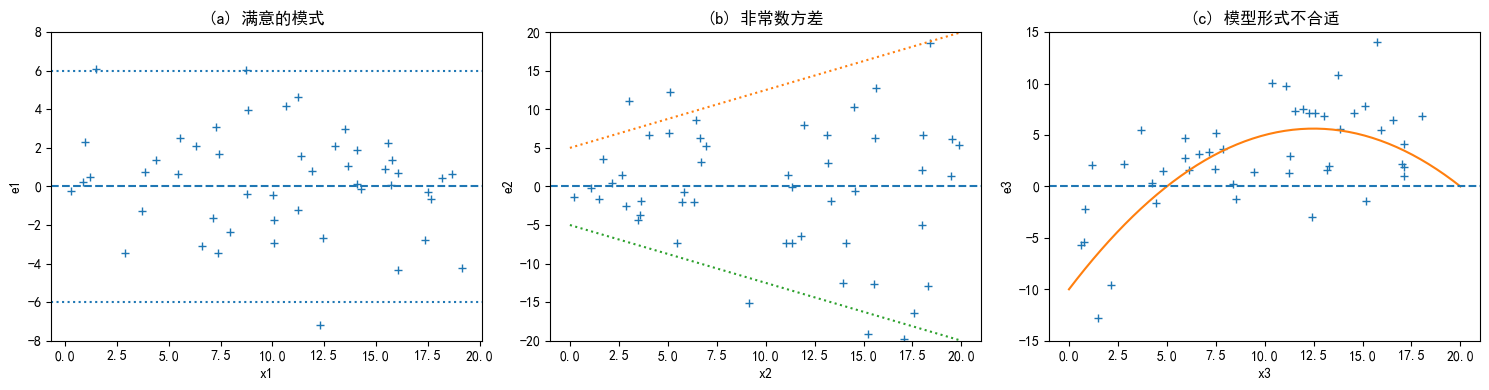

In [13]:
# 绘制不同形态的残差图
np.random.seed(1234) # 设置随机种子
plt.subplots(1, 3, figsize=(15, 4)) # 设置画布大小

plt.subplot(131) # 创建第一个子图
x1 = np.random.uniform(0, 20, 50) # 创建自变量
e1 = np.random.normal(0, 3, 50) # 创建误差项
plt.plot(x1, e1, '+') # 绘制散点图
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.axhline(-6, linestyle=':') # 绘制e=-6的直线
plt.axhline(6, linestyle=':') # 绘制e=6的直线
plt.xlabel('x1') # 设置x轴标签
plt.ylabel('e1') # 设置y轴标签
plt.ylim(-8, 8)
plt.title('(a) 满意的模式')

plt.subplot(132) # 创建第二个子图
x2 = np.random.uniform(0, 20, 50) # 创建自变量
e2 = np.random.normal(0, 3, 50) # 创建误差项
e2 = x2 ** 0.4 * e2 # 修改误差项, 使其与自变量相关
plt.plot(x2, e2, '+') # 绘制散点图
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.plot([0, 20], [5, 20], ':') # 绘制上限
plt.plot([0, 20], [-5, -20], ':') # 绘制下限
plt.xlabel('x2') # 设置x轴标签
plt.ylabel('e2') # 设置y轴标签
plt.ylim(-20, 20)
plt.title('(b) 非常数方差')

plt.subplot(133) # 创建第三个子图
x3 = np.random.uniform(0, 20, 50) # 创建自变量
y = lambda x: - 0.1 * x ** 2 + 2.5 * x - 10 # 创建函数
e3 = y(x3) + np.random.normal(0, 5, 50) # 创建误差项
plt.plot(x3, e3, '+') # 绘制散点图
plt.plot(np.linspace(0, 20, 50), y(np.linspace(0, 20, 50)), '-') # 绘制函数图像
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.xlabel('x3') # 设置x轴标签
plt.ylabel('e3') # 设置y轴标签
plt.ylim(-15, 15)
plt.title('(c) 模型形式不合适')

plt.tight_layout() # 设置子图的间距
plt.show() # 展示图像

### 4.2 检验模型假定

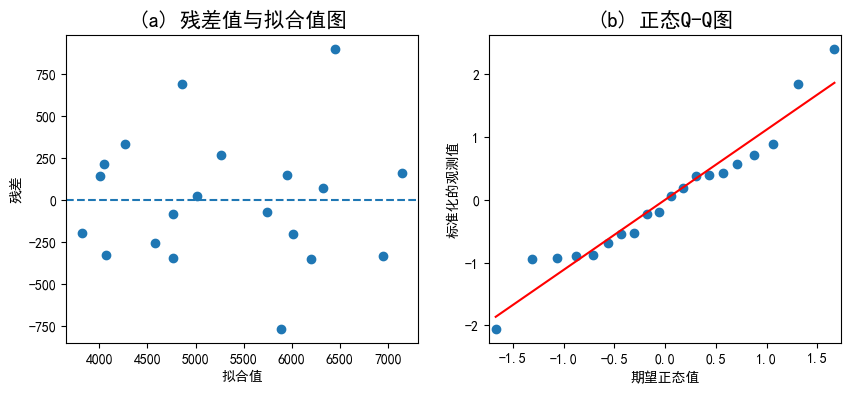

In [14]:
# 残差的正态性与方差齐性
plt.subplots(1, 2, figsize=(10, 4)) # 设置画布大小

plt.subplot(121) # 创建第一个子图
plt.scatter(model.fittedvalues, model.resid) # 绘制散点图
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.xlabel('拟合值') # 设置x轴标签
plt.ylabel('残差') # 设置y轴标签
plt.title('(a) 残差值与拟合值图', fontsize=15) # 设置子图标题

ax2 = plt.subplot(122) # 创建第二个子图
pplot = sm.ProbPlot(model.resid, fit=True) # 创建概率图对象
pplot.qqplot(line='r', ax=ax2, xlabel='期望正态值', ylabel='标准化的观测值') # 绘制Q-Q图
ax2.set_title('(b) 正态Q-Q图', fontsize=15) # 设置子图标题

plt.show()

In [15]:
# 残差是否独立（无自相关性）
# Durbin-Watson检验
dw = durbin_watson(model.resid) # 计算DW检验的值
print(f'Durbin-Watson检验的值为{dw:.2f}')

Durbin-Watson检验的值为1.68
